In [13]:
# -----------------------------------------
# 1. Import everything
# -----------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

In [14]:
# -----------------------------------------
# 2. Load Data
# -----------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
# -----------------------------------------
# 3. Preprocessing
# -----------------------------------------
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

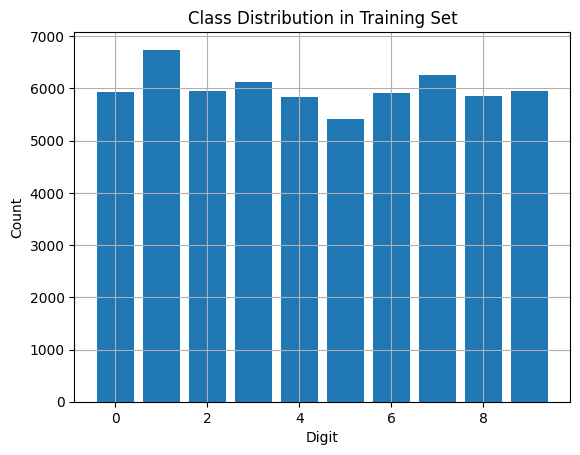

In [16]:
# -----------------------------------------
# 📊 (Optional) Plot Class Distribution BEFORE Training
# -----------------------------------------
unique, counts = np.unique(y_train, return_counts=True)

plt.figure()
plt.bar(unique, counts)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.grid(True)
plt.show()

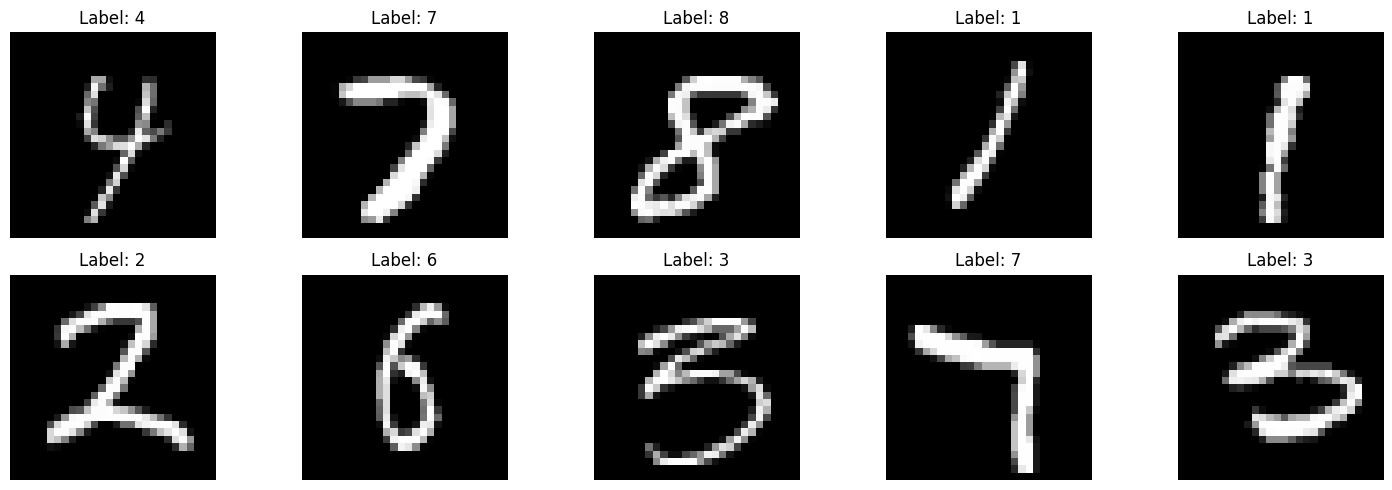

In [17]:
# -----------------------------------------
# 🎨 (Optional) Show Sample Images BEFORE Training
# -----------------------------------------
plt.figure(figsize=(15,5))
for i in range(10):
    idx = np.random.randint(0, len(X_train))
    img = X_train[idx].reshape(28,28)
    label = y_train[idx]
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------------------
# 4. Create and Train Model
# -----------------------------------------
print("Training SVM model... (this may take a while)")
model = svm.SVC(kernel='rbf', probability=True)

model.fit(X_train, y_train)

Training SVM model... (this may take a while)


SVC(probability=True)

In [19]:
# -----------------------------------------
# 5. Save Model
# -----------------------------------------
with open('svm_mnist_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as svm_mnist_model.pkl")

✅ Model saved as svm_mnist_model.pkl


In [20]:
# -----------------------------------------
# 6. Predict and Evaluate
# -----------------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9792


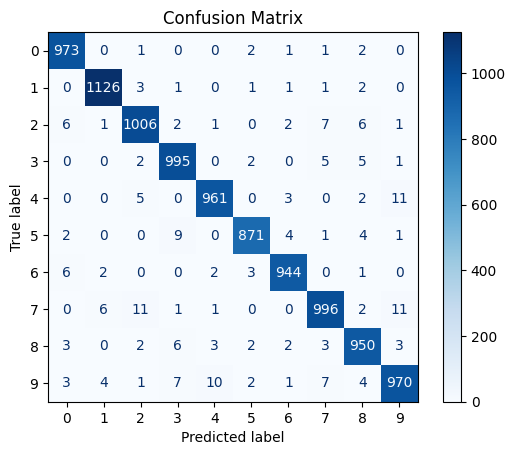

In [21]:
# -----------------------------------------
# 📈 (Optional) Plot Confusion Matrix AFTER Prediction
# -----------------------------------------
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

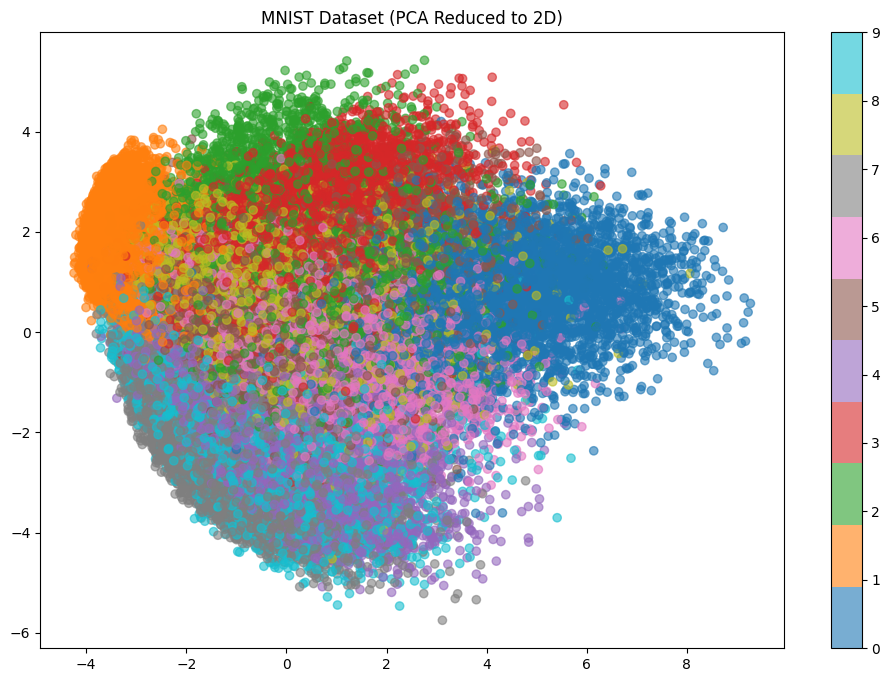

In [22]:
# -----------------------------------------
# 🌌 (Optional) PCA Visualization (for fun)
# -----------------------------------------
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

plt.figure(figsize=(12,8))
scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title('MNIST Dataset (PCA Reduced to 2D)')
plt.show()